In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# read data
data_path = "C:\\Repository\\DS-Intership-data\\clean_data\\"
item_categories = pd.read_csv(data_path + "item_categories.csv", index_col=0)
items = pd.read_csv(data_path + "items.csv", index_col=0)
sales_train = pd.read_csv(data_path + "sales_train.csv", index_col=0)
sample_submission = pd.read_csv(data_path + "sample_submission.csv", index_col=0)
shops = pd.read_csv(data_path + "shops.csv", index_col=0)
test = pd.read_csv(data_path + "test.csv", index_col=0)
sales_per_months = pd.read_csv(data_path + "sales_per_months.csv", index_col=0)

In [3]:
# we can try to check what clusters have low/high sales
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [5]:
# for checking the most popular items 
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 692.8+ KB


In [7]:
# can try check how time (seasons, special months) correlation with sales
# can check for shops with largest amount of sales
# can compare sales of cheap items vs expensive
# corr matrix

sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0


In [8]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928491 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.4+ MB


In [9]:
# for check how time (every month) influence on sales
sales_per_months.head()

,ID,item_cnt_month
month_year,,
2013-01,5122,1.0
2013-01,5127,3.0
2013-01,5142,2.0
2013-01,5143,9.0
2013-01,5152,1.0


In [10]:
sales_per_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599912 entries, 2013-01 to 2015-10
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              599912 non-null  int64  
 1   item_cnt_month  599912 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 13.7+ MB


In [11]:
# check what shops have best income
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [13]:
# clusters by sales
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 6.5 MB


## EDA

###### checking of sales distributuon:

C:\Users\maxim\AppData\Local\Temp\ipykernel_4208\3682997020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_per_months.item_cnt_month)


<Axes: xlabel='item_cnt_month', ylabel='Density'>

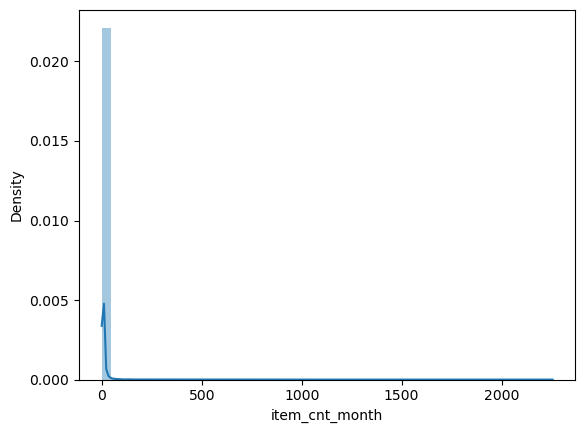

In [15]:
sns.distplot(sales_per_months.item_cnt_month)

In [65]:
sales_per_months['item_cnt_month'].value_counts().head(20)

1.0     359827
2.0     110095
3.0      45867
4.0      24420
5.0      15036
6.0       9872
7.0       6615
8.0       5004
9.0       3550
10.0      2823
11.0      2086
12.0      1710
13.0      1494
14.0      1157
15.0      1002
16.0       838
17.0       761
18.0       636
19.0       563
20.0       469
Name: item_cnt_month, dtype: int64

C:\Users\maxim\AppData\Local\Temp\ipykernel_4208\1527808153.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_per_months[sales_per_months.item_cnt_month<1000])


<Axes: ylabel='Density'>

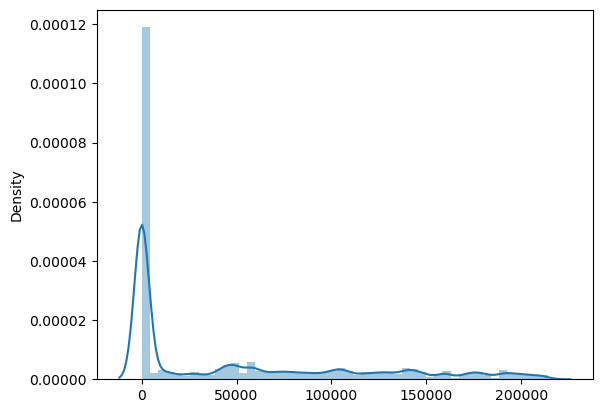

In [61]:
sns.distplot(sales_per_months[sales_per_months.item_cnt_month<1000])

###### looks like exp dist with very long tail

In [18]:
sales_per_months.describe()

,ID,item_cnt_month
count,599912.000000,599912.000000
mean,98550.754301,2.701725
std,58056.072708,11.292584
min,0.000000,1.000000
25%,49330.000000,1.000000
50%,94305.000000,1.000000
75%,143391.000000,2.000000
max,214199.000000,2253.000000


###### as 75% of item_cnt_months is 2 most probably value like 2253 is outliers, so in the next parts of feature preprocessing we should cut long tail of our distribution to delete more outliers

###### checking for corr between time and sales (Timeseries analysis):

C:\Users\maxim\AppData\Local\Temp\ipykernel_4208\457552482.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07'),
 Text(31, 0, '2015-08'),
 Text(32, 0, '2015-09'),
 Text(33, 0, '2015-10')]

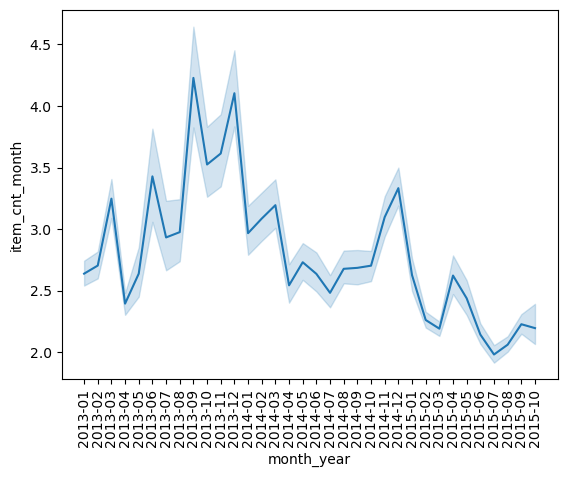

In [20]:
g = sns.lineplot(x=sales_per_months.index, y=sales_per_months.item_cnt_month)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

###### ascending trend (from 2013 to 2014), descending trend (from 2014), the is seasonality (sales go up and down between month), no cycle (maybe need more years data for detect it)

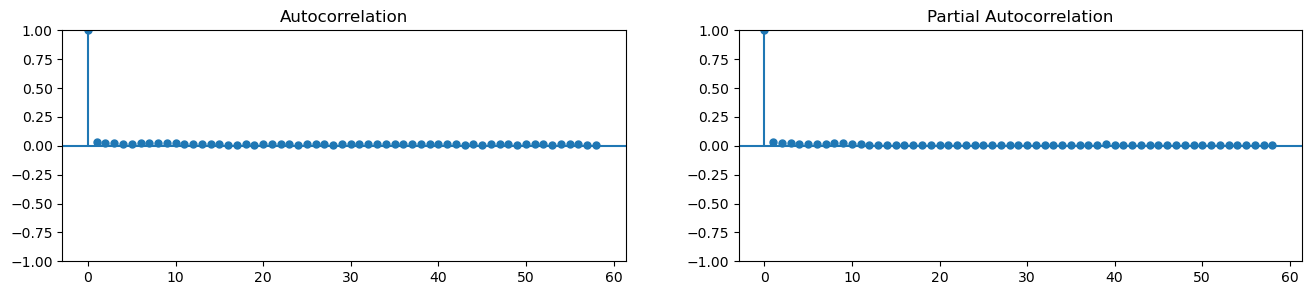

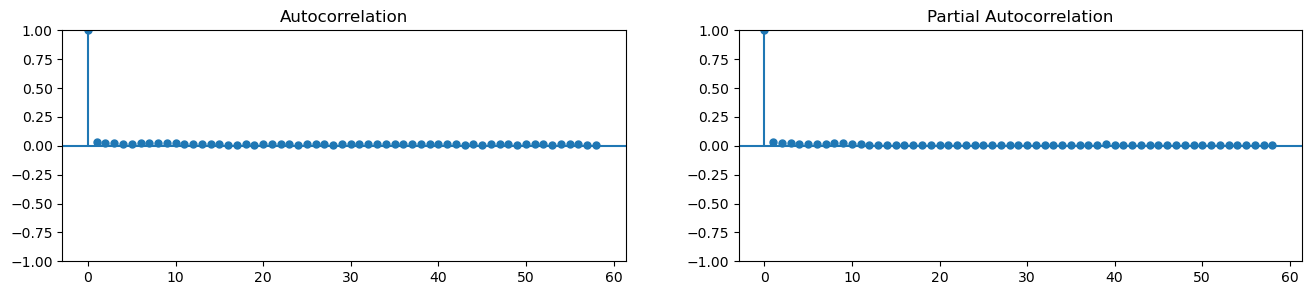

In [87]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(sales_per_months['item_cnt_month'], lags=None, ax=axes[0])
plot_pacf(sales_per_months['item_cnt_month'], lags=None, ax=axes[1])

###### check how years and month with same names correlated by sales

In [129]:
sales_per_day.head()

,ID,date,item_cnt_day
0,0,2014-09-21,1.0
1,0,2014-11-29,1.0
2,0,2014-12-20,1.0
3,0,2014-12-28,1.0
4,0,2015-01-02,1.0


In [130]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [112]:
# for m, y in months[0:1]:
#     print(m, y)
#     sns.lineplot(x=sales_per_months[sales_per_months.index == y+"-"+m], y=sales_per_months[sales_per_months.index == y+"-"+m].item_cnt_month)

1 2013


ValueError: Data must be 1-dimensional

###### Draft

In [45]:
sales_train.merge(test, on=['shop_id', 'item_id'], how='inner').groupby(['ID', 'date'])['item_cnt_day'].agg(sum)\
    .sort_values(ascending=False).reset_index().head(10)

,ID,date,item_cnt_day
0,37296,2015-10-28,2169.0
1,36160,2015-01-15,1000.0
2,35754,2015-04-14,624.0
3,37296,2015-05-19,539.0
4,56560,2014-06-28,501.0
5,36160,2015-10-14,500.0
6,36160,2014-12-19,500.0
7,35874,2015-05-19,480.0
8,66760,2014-03-15,405.0
9,37341,2015-05-19,343.0


In [54]:
sales_per_day = sales_train.merge(test, on=['shop_id', 'item_id'], how='inner').groupby(['ID', 'date'])['item_cnt_day'].agg(sum).reset_index()

In [55]:
sales_per_day[sales_per_day.ID == 37296]

,ID,date,item_cnt_day
161057,37296,2013-01-08,1.0
161058,37296,2013-01-31,5.0
161059,37296,2013-02-01,1.0
161060,37296,2013-02-04,1.0
161061,37296,2013-03-11,2.0
...,...,...,...
161516,37296,2015-10-23,3.0
161517,37296,2015-10-26,3.0
161518,37296,2015-10-27,1.0
161519,37296,2015-10-28,2169.0


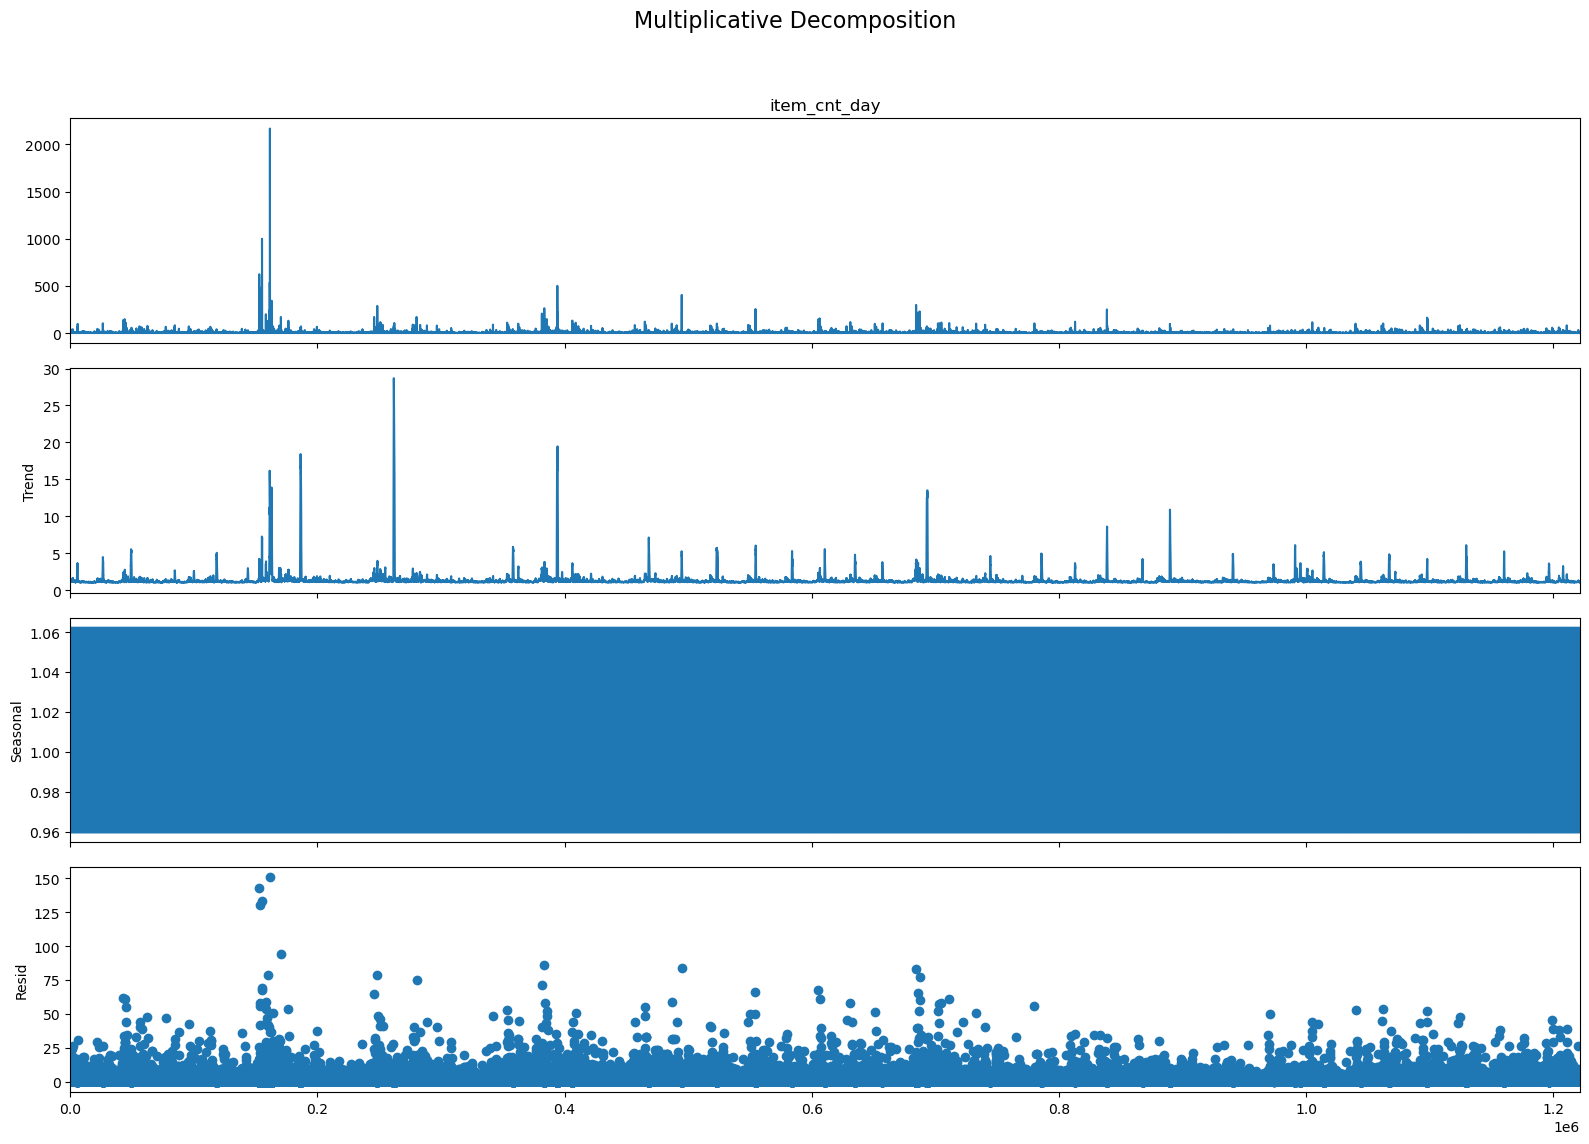

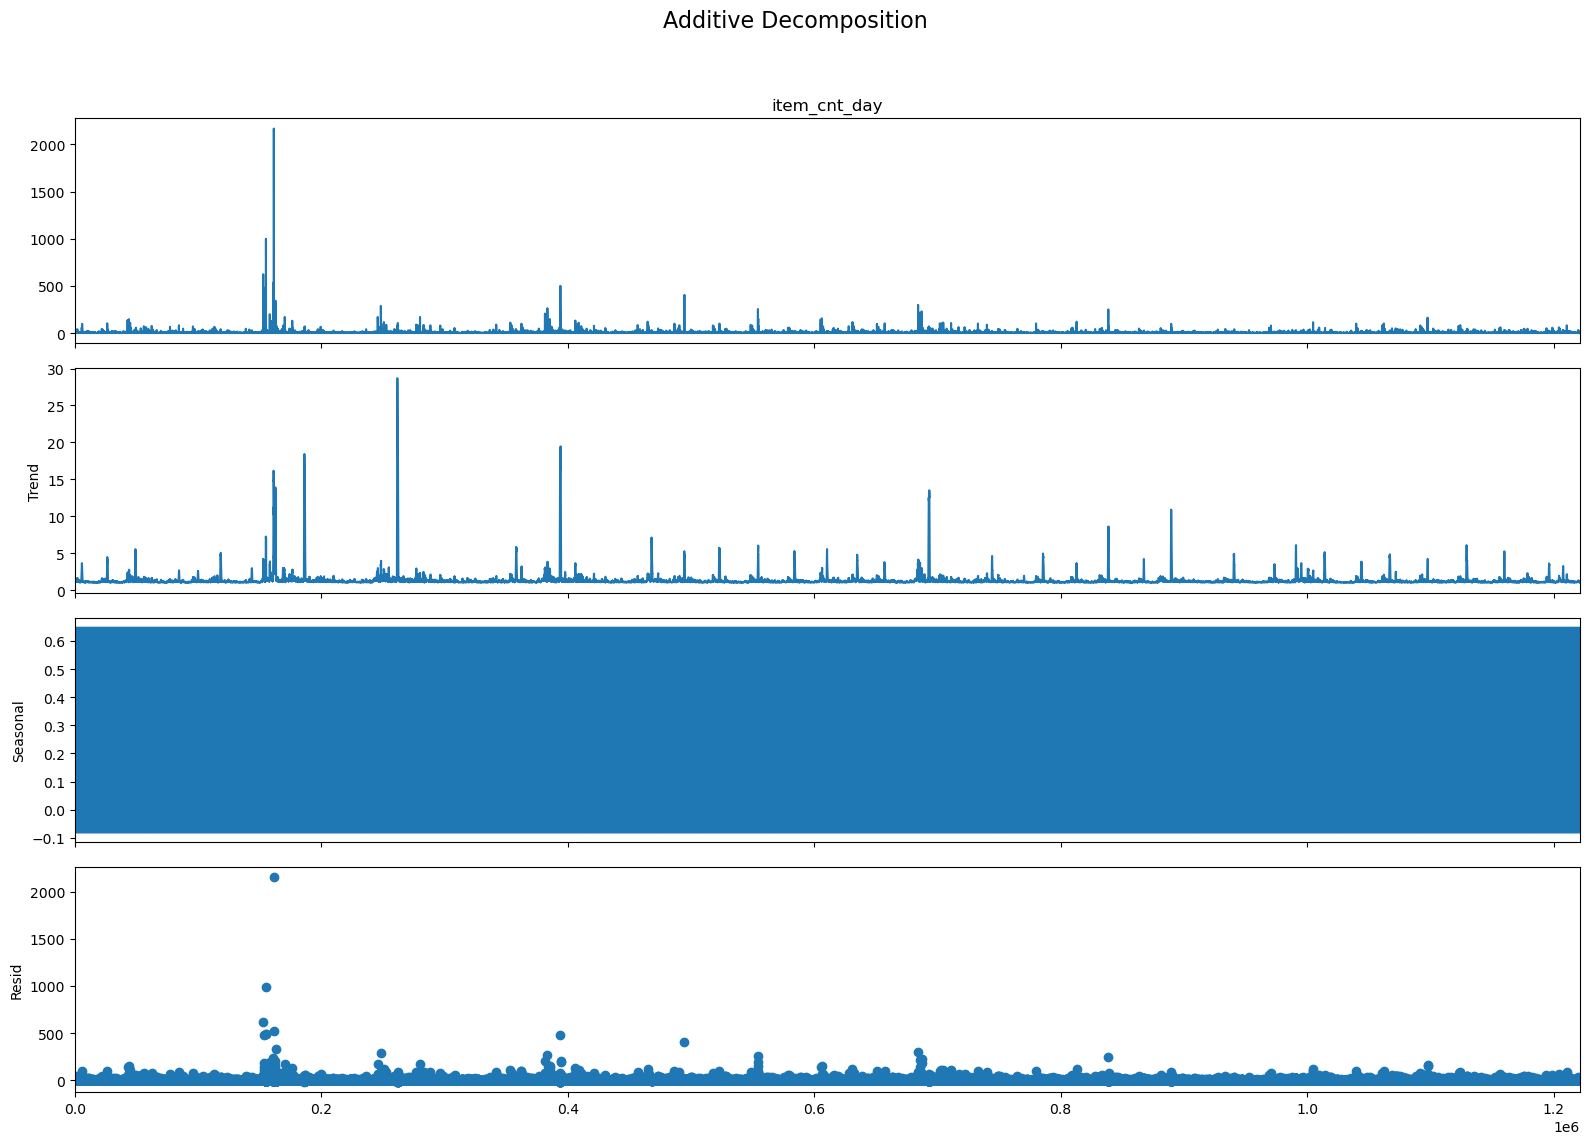

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(sales_per_day['item_cnt_day'], model='multiplicative', period=365)

# Additive Decomposition
additive_decomposition = seasonal_decompose(sales_per_day['item_cnt_day'], model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<Axes: xlabel='date', ylabel='item_cnt_day'>

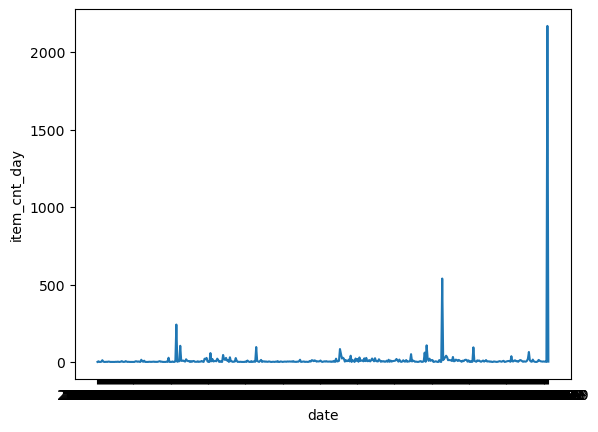

In [58]:
sns.lineplot(x=sales_per_day[sales_per_day.ID == 37296].date, y=sales_per_day[sales_per_day.ID == 37296].item_cnt_day)

The autocorrelation plot


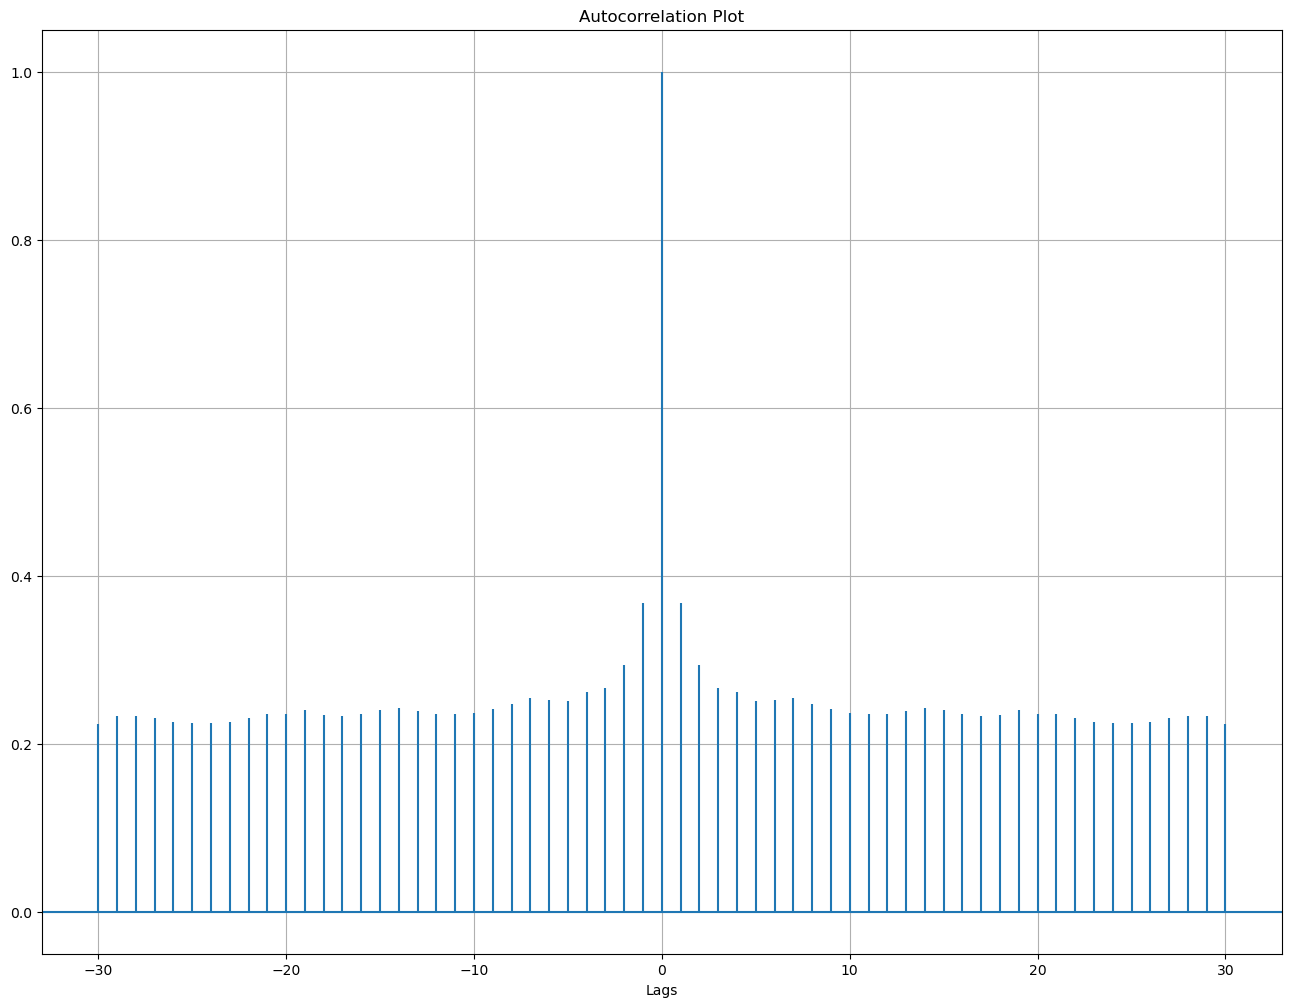

In [82]:
plt.title("Autocorrelation Plot")
plt.xlabel("Lags")
plt.acorr(sales_per_day['item_cnt_day'], maxlags = 30)
print("The autocorrelation plot")
plt.grid(True)
plt.show()

###### check for shops with largest/smallest amount of sales

In [21]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [22]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [23]:
shops_month = shops.merge(test, how='inner', on='shop_id')

In [24]:
shops_month = sales_per_months.merge(shops_month, how='inner', on='ID')

In [25]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).head(10)

shop_name
Москва ТЦ "Семеновский"            160333.0
Москва ТРК "Атриум"                123810.0
Москва ТЦ "МЕГА Теплый Стан" II    100108.0
СПб ТК "Невский Центр"              83076.0
Якутск Орджоникидзе, 56             67785.0
Воронеж (Плехановская, 13)          51502.0
Интернет-магазин ЧС                 46744.0
Якутск ТЦ "Центральный"             43036.0
Сергиев Посад ТЦ "7Я"               42388.0
Сургут ТРЦ "Сити Молл"              42204.0
Name: item_cnt_month, dtype: float64

In [26]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).tail(10)

shop_name
Самара ТЦ "ПаркХаус"                     21994.0
Самара ТЦ "Мелодия"                      21725.0
Томск ТРЦ "Изумрудный Город"             19647.0
Адыгея ТЦ "Мега"                         19083.0
Балашиха ТРК "Октябрь-Киномир"           16902.0
Жуковский ул. Чкалова 39м?               13429.0
РостовНаДону ТРК "Мегацентр Горизонт"    12634.0
Тюмень ТРЦ "Кристалл"                    12588.0
Н.Новгород ТРЦ "РИО"                      5318.0
Новосибирск ТРЦ "Галерея Новосибирск"      327.0
Name: item_cnt_month, dtype: float64

###### we can try to cluster shops by type of cities (e. g. city, small city, town, village etc. ) and type of shop location (center, middle, edge of city etc.)

###### Corr matrix

In [60]:
sales_train.drop(columns=['date', 'shop_id', 'item_id']).corr()

,date_block_num,item_price,item_cnt_day
date_block_num,1.000000,0.095497,0.009434
item_price,0.095497,1.000000,0.012008
item_cnt_day,0.009434,0.012008,1.000000


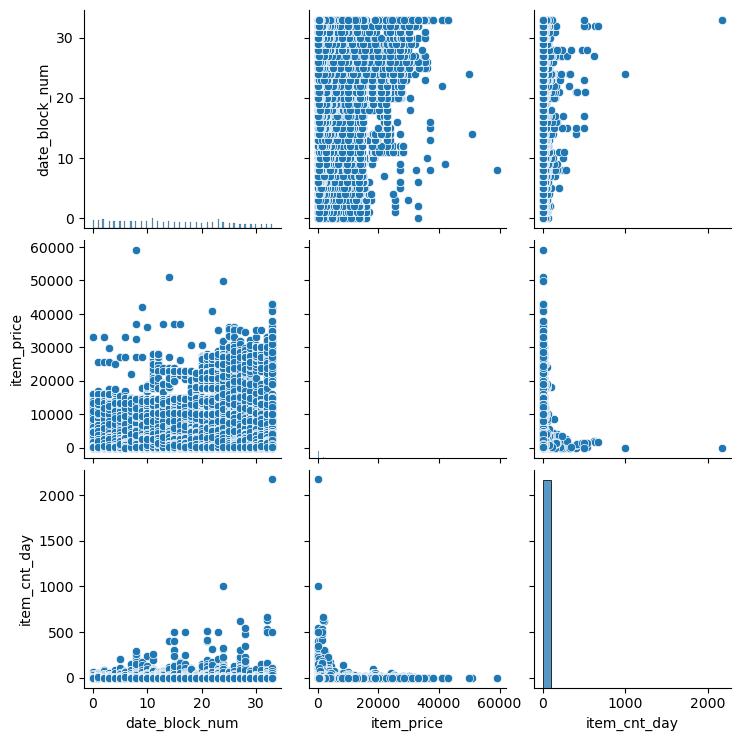

In [29]:
sns.pairplot(sales_train.drop(columns=['shop_id', 'item_id']))

###### as we can see cheap items are bought in bulk, so we can make clusters for item_price (eg. cheap, medium, expensive)